In [ ]:
# Mengimpor pustaka pandas untuk manipulasi data berbasis tabel (DataFrame)
import pandas as pd

# Mengimpor matplotlib.pyplot untuk membuat grafik dan visualisasi dasar
import matplotlib.pyplot as plt

# Mengimpor seaborn untuk visualisasi data yang lebih menarik dan informatif
import seaborn as sns

# Mengimpor fungsi train_test_split untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Mengimpor LabelEncoder untuk mengubah data kategori (label) menjadi angka
from sklearn.preprocessing import LabelEncoder

# Mengimpor algoritma K-Nearest Neighbors (KNN) untuk klasifikasi
from sklearn.neighbors import KNeighborsClassifier

# Mengimpor metrik evaluasi: akurasi, laporan klasifikasi, dan confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 2. Load Dataset
df = pd.read_csv('Iris.csv')
df = df.drop(columns=['Id'])  # Hapus kolom ID

In [ ]:
# Encode label target menjadi angka
le = LabelEncoder()
y_encoded = le.fit_transform(df['Species'])

print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# mengubah Output ke bentuk label
le.inverse_transform([0, 1, 2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Memanggil dataset dan menampilkannya
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#memberikan informasi detail mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


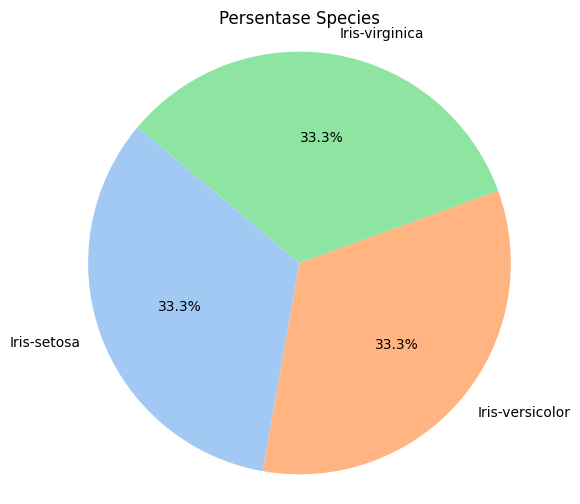

In [ ]:
# Mengatur palet warna Seaborn agar tampilannya lembut/pastel
sns.set_palette("pastel")

# Menghitung jumlah masing-masing spesies dalam kolom 'Species'
species_counts = df['Species'].value_counts()

# Membuat figure dengan ukuran 6x6 inci
plt.figure(figsize=(6, 6))

# Membuat diagram pie berdasarkan jumlah spesies
plt.pie(
    species_counts,
    labels=species_counts.index,
    autopct='%1.1f%%',
    startangle=140
)

# Menambahkan judul grafik
plt.title('Persentase Species')

# Mengatur agar pie chart berbentuk lingkaran sempurna
plt.axis('equal')

# Menampilkan pie chart
plt.show()


Dataset seimbang sempurna → Masing-masing kelas memiliki jumlah data yang sama (50 sampel).
- Iris-setosa (50 species)
- Iris-virginica (50 species)
- Iris-versicolor (50 species)

In [ ]:
# Mengambil semua kolom numerik dari DataFrame, misalnya panjang dan lebar kelopak bunga
# Lalu menghitung korelasi antar kolom numerik tersebut menggunakan metode ".corr"

df.select_dtypes(include='number').corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


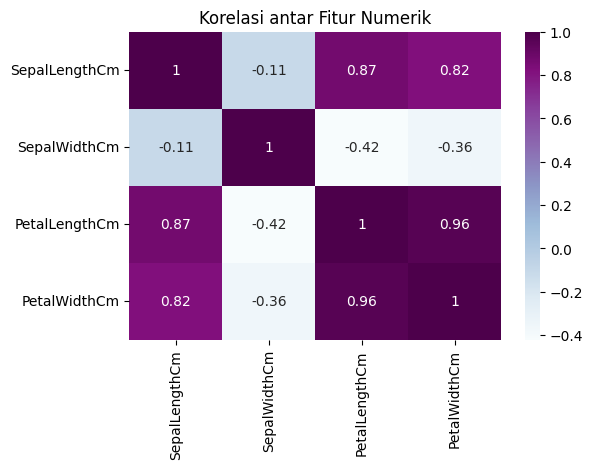

In [ ]:
# Membuat figure (kanvas gambar) dengan ukuran 6x4 inci
plt.figure(figsize=(6, 4))

# Membuat heatmap (peta panas) dari korelasi antar fitur numerik dalam DataFrame
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    cmap='BuPu',
    annot=True
)

# Menambahkan judul grafik
plt.title("Korelasi antar Fitur Numerik")

# Menampilkan heatmap
plt.show()


Setelah kita visualisasikan menggunakan heatmap, terlihat bahwa fitur PetalLengthCm dan PetalWidthCm memiliki korelasi positif sangat kuat (r = 0.96). Hal ini menunjukkan bahwa keduanya naik secara bersamaan dan sangat relevan dalam membedakan jenis bunga. Sementara itu, SepalWidthCm menunjukkan korelasi yang lemah atau bahkan negatif terhadap fitur lain, sehingga mungkin kurang dominan dalam klasifikasi.

In [ ]:
# 4. Bagi data latih dan data uji
x = df.drop(columns=['Species'])
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# 5. Inisialisasi dan latih model K-NN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
# 6. Prediksi data uji
y_pred = knn.predict(x_test)

Setelah model K-NN dilatih menggunakan data latih, kini kita mengujinya menggunakan data uji (x_test).

In [ ]:
# 7. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


Tingkat keakuratan/accuracy nya menunjukkan hasil sempurna yaitu 100%, yang artinya :
- Tidak ada satu pun kesalahan prediksi pada data uji (X_test).
- Semua label prediksi (y_pred) sama persis dengan label asli (y_test).

In [ ]:
# Laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=le.classes_)
print("\nClassification Report:")
print(report)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Setelah melatih model dan mengujinya dengan data latih, model K-NN yang digunakan menunjukkan performa yang sangat baik. Hal ini ditunjukkan dengan hasil akurasi sebesar 1.00 atau 100%, yang berarti semua prediksi model pada data uji sesuai dengan label sebenarnya.

Selain itu, hasil dari classification report juga menunjukkan nilai precision, recall, dan f1-score sebesar 1.00 pada ketiga kelas (Iris-setosa, Iris-versicolor, dan Iris-virginica). Ini menandakan bahwa model mampu mengenali setiap spesies dengan sempurna tanpa kesalahan klasifikasi.

Berdasarkan hasil evaluasi ini, dapat disimpulkan bahwa model K-NN sangat efektif digunakan pada dataset Iris karena fitur-fitur numeriknya (panjang dan lebar kelopak/sepal) cukup kuat membedakan antar kelas.

In [ ]:
# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

<Figure size 600x600 with 0 Axes>

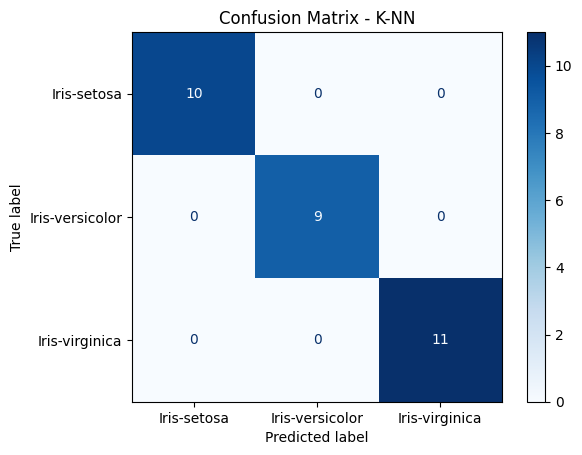

In [ ]:
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - K-NN")
plt.grid(False)

# Menampilkan visualisasi
plt.show()


In [ ]:
from sklearn.svm import SVC
import numpy as np

# Membuat objek classifier SVM dengan parameter default (kernel RBF)
clf = SVC()

# Melatih model SVM menggunakan data latih (fitur dan label)
clf.fit(x_train, y_train)

# Menggunakan model yang sudah dilatih untuk memprediksi data uji
hasil_SVM = clf.predict(x_test)

# Mengukur akurasi hasil prediksi dengan membandingkan hasil prediksi vs label asli
print('SVM Score : ', accuracy_score(hasil_SVM, y_test))


SVM Score :  1.0


Model SVM yang diterapkan berhasil mencapai akurasi 100% pada data uji, yang menunjukkan bahwa semua data berhasil diklasifikasikan dengan tepat. Hal ini memperkuat bukti bahwa fitur-fitur pada dataset Iris sangat cocok dipisahkan menggunakan pendekatan SVM dengan kernel RBF.

In [ ]:
from sklearn.metrics import mean_squared_error

# Menghitung nilai MSE antara label sebenarnya dan hasil prediksi SVM
mse = mean_squared_error(y_test, hasil_SVM)

# Menghitung akar dari MSE untuk mendapatkan nilai RMSE
rmse = np.sqrt(mse)

# Menampilkan nilai RMSE
print("RMSE : ", rmse)


RMSE :  0.0


Nilai RMSE = 0.0 menunjukkan bahwa tidak ada kesalahan prediksi pada data uji. Meskipun RMSE bukan metrik utama dalam klasifikasi, hasil ini konsisten dengan akurasi 100% yang telah diperoleh sebelumnya.





In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Mengimpor fungsi accuracy_score untuk mengukur akurasi model
from sklearn.metrics import accuracy_score

# Membuat model K-NN dengan jumlah tetangga terdekat (k) sebanyak 9
knn = KNeighborsClassifier(n_neighbors=9)

# Melatih model K-NN menggunakan data latih (fitur dan label)
knn.fit(x_train, y_train)

# Menggunakan model yang sudah dilatih untuk memprediksi data uji
y_pred = knn.predict(x_test)

# Mengukur dan mencetak akurasi hasil prediksi terhadap label sebenarnya
print("K-NN Accuracy Score:", accuracy_score(y_test, y_pred))


K-NN Accuracy Score: 1.0


Model K-NN berhasil mencapai akurasi sebesar 100% saat diuji pada data uji (test set). Ini menunjukkan bahwa fitur-fitur yang digunakan sudah cukup merepresentasikan karakteristik setiap spesies bunga, dan parameter k=9 bekerja sangat optimal dalam kasus ini.

In [ ]:
#membuat dataset baru untuk prediksi jenis bunga
new_data = {
    'SepalLengthCm': [5.1],
    'SepalWidthCm': [3.5],
    'PetalLengthCm': [1.4],
    'PetalWidthCm': [0.2]
}

new_data = pd.DataFrame(new_data)

print(new_data)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2


In [ ]:
#Hitung Prediksi
prediction = knn.predict(new_data)
predicted_label = le.inverse_transform(prediction)  # mengubah label angka ke nama spesies

print("Prediksi jenis bunga:", predicted_label[0])

Prediksi jenis bunga: Iris-setosa


Berdasarkan pengujian terhadap data baru, model K-NN berhasil memprediksi jenis bunga sebagai Iris-setosa. Hal ini menunjukkan bahwa model telah berhasil mempelajari pola dari data latih dan mampu melakukan prediksi yang akurat terhadap data yang belum pernah dilihat sebelumnya.